<a href="https://colab.research.google.com/github/Jenn-mawia/Hypothyroidism-Classification/blob/main/Hypothyroidism_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of Hypothyroidism status of patients**

# Defining the question

**Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.**

# Specifying the question

**Part 1: Decision trees:**
- Build a model that makes the above prediction using at least 2 out of the 3 advanced models:
  - Random forests, Ada boosted trees, and gradient boosted trees.
- Optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction

**Part 2: SVM:**
- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best.
-Tune your parameters to improve the performance of your model. Make sure to visualize the models you've created. Use any two features to build the models for this step.

Use decision trees to give you the most preferable features you can use. 

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version.

# Defining the metrics for success

>This project will be considered a success if:
- various models are created and the best performing model is determined
- the best model fits the criteria of few misclassification errors and overcomes overfitting and underfitting problems




# Understanding the context

Hypothyroidism is evaluated and diagnosed by a physician, usually an endocrinologist or doctor. Symptoms, signs, and more critically, blood tests—are taken into consideration when evaluating the possibility of an underactive thyroid gland—all of which help identify the cause and severity of the disease.

A diagnosis is reached after a thorough review of the patient’s personal medical and family histories, any risk factors, findings on physical examination, in addition to the results of thyroid function levels. There are several types of hormones checked in a blood test to assess your thyroid status—the most definitive one is the TSH (thyroid-stimulating hormone). Often, physicians may decide to check the free thyroxine, or T4, free T4 index, or total T4 to aid in the diagnosis.

**Blood Tests:** Hypothyroidism can be detected by different blood tests: 
- **TSH Test** A thyroid-stimulating hormone or TSH is a blood test that measures the amount of T4 (thyroxine) that the thyroid is being signaled to make. If you have an abnormally high level of TSH, it could mean you have hypothyroidism.
- **T4 (thyroxine) Test**. The thyroid gland produces T4 (thyroxine). The free T4 and the free T4 index are blood tests that, in combination with a TSH test, can let your physician know how your thyroid is functioning. 

**Normal and Abnormal TSH Ranges**

- ***0.4 mU/L to 4.0 mU/L*** is considered the reference range, and people who have a normally functioning thyroid gland usually fall within this range.
- If TSH measures > 4.0 mU/L, a second test (T4) is performed to verify the results. ***TSH > 4.0/mU/L with a low T4*** level indicates hypothyroidism.
- If your ***TSH is > 4.0 mU/L and your T4 level is normal***, this may prompt your physician to test your serum anti-thyroid peroxidase (anti-TPO) antibodies. When these antibodies are present, it may indicate an *autoimmune thyroid disorder*, which is a risk factor for developing hypothyroidism.  If you have these antibodies, your doctor will most likely perform and TSH test at least once per year.

# Experimental design

The following is the order in which I went about this project:

- Data sourcing & understanding
- Checking the data (shape, number of records, datatypes)
- Data cleaning procedures (handling null values,outliers, anomalies, datatype conversion)
- Exploratory data analysis (Univariate, Bivariate, Multivariate analyses)
- Implementing the solution
  - Decision Trees
    - Random Forest Classifier
    - Gradient Boosting Classifier
    - Ada Boost Classifier
  - Support Vector Machines
    - Modelling with two features
      - Linear SVC
      - Polynomial SVC
      - Radial Basis Function SVC
    - Hyperparameter tuning
    - Remodelling using RBF kernel and tuned parameters on all features
  - Challenging the solution
-Follow up questions

# Importing Libraries

In [1]:
# data manipulation/processing
import pandas as pd
# linear algebra
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing/scaling
from sklearn.preprocessing import StandardScaler

# modeling
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [2]:
data = pd.read_csv("http://bit.ly/hypothyroid_data")

# Checking the data

In [3]:
# number of rows and columns in the data
data.shape

(3163, 26)

In [4]:
# check the top of the dataset
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
# check the bottom of the data
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
# check the datatypes of the columns
data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

>The datatypes of each column is object / string type despite some columns having numeric data. This needs to be converted during data cleaning.

# Appropriateness of the available data to answer the given question

The data available is a csv file which can be downloaded on this [link](http://bit.ly/hypothyroid_data).

The data contains features such as whether the patient is on thyroxine, or anti-thyroid medication, TSH measurements, T4 measurements, age, presence of a tumor and also that of goitre among other features therein

All these features are always useful to a physician during diagnosis of a patient and are therefore also going to be really helpful to answer the question of classifying whether a patient has hypothyroidism or not.

Therefore, we can conclude that the data available is appropriate and relevant to the needs of the research question(classifying hypothyroidsm).


# **Data Cleaning**

>Missing data has been represented with symbol "?" in the dataset. We can specify null value representation when loading/reading the data so that it is much easier to count missing values

In [7]:
# read the data once again, this time specifying the null values parameter as "?" 
rawfile = pd.read_csv("http://bit.ly/hypothyroid_data", na_values=['?'])
rawfile.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


## Data-Type Conversion

>Label encode all categorical columns to numeric values then convert the datatypes of the all columns to numeric since we will end up having numeric data in all columns

In [8]:
# check for categorical columns in the data and print them out

# Categorical boolean mask
categorical_feature_mask = rawfile.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = rawfile.columns[categorical_feature_mask].tolist()
print(categorical_cols)



['status', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']


In [9]:
# convert categorical columns to interger types using labelencoder

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
# rawfile['status'] = le.fit_transform(rawfile['status'])
# rawfile['sex'] = le.fit_transform(rawfile['sex'])
rawfile['on_thyroxine'] = le.fit_transform(rawfile['on_thyroxine'])
rawfile['query_on_thyroxine'] = le.fit_transform(rawfile['query_on_thyroxine'])
rawfile['on_antithyroid_medication'] = le.fit_transform(rawfile['on_antithyroid_medication'])
rawfile['thyroid_surgery'] = le.fit_transform(rawfile['thyroid_surgery'])
rawfile['query_hypothyroid'] = le.fit_transform(rawfile['query_hypothyroid'])
rawfile['query_hyperthyroid'] = le.fit_transform(rawfile['query_hyperthyroid'])
rawfile['pregnant'] = le.fit_transform(rawfile['pregnant'])
rawfile['sick'] = le.fit_transform(rawfile['sick'])
rawfile['tumor'] = le.fit_transform(rawfile['tumor'])
rawfile['lithium'] = le.fit_transform(rawfile['lithium'])
rawfile['goitre'] = le.fit_transform(rawfile['goitre'])
rawfile['TSH_measured'] = le.fit_transform(rawfile['TSH_measured'])
rawfile['T3_measured'] = le.fit_transform(rawfile['T3_measured'])
rawfile['TT4_measured'] = le.fit_transform(rawfile['TT4_measured'])
rawfile['T4U_measured'] = le.fit_transform(rawfile['T4U_measured'])
rawfile['FTI_measured'] = le.fit_transform(rawfile['FTI_measured'])
rawfile['TBG_measured'] = le.fit_transform(rawfile['TBG_measured'])

# convert categorical values to integer
# Sex column 
rawfile.loc[rawfile.sex== 'M', 'sex'] = 0
rawfile.loc[rawfile.sex== 'F','sex'] = 1

# status column
rawfile.loc[rawfile.status== 'hypothyroid', 'status'] = 1
rawfile.loc[rawfile.status== 'negative','status'] = 0
# view the changes made
rawfile[categorical_cols].tail(10)


,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
3153,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0
3154,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3155,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3156,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0
3157,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3158,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3159,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3160,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3161,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3162,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0


In [10]:
# data type conversion

# Columns with dtype as 'object'
cols = rawfile.columns[rawfile.dtypes.eq('object')]
print(cols)
# Convert the columns to numeric datatypes
rawfile[cols] = rawfile[cols].apply(pd.to_numeric, errors='coerce')
# check the changes made
rawfile.info()


Index(['status', 'sex'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   int64  
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   float64
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre 

## Missing Values

In [11]:
# count the number of missing data in each column
rawfile.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

>The null values are a lot and deleting them will result in a very small dataset with minimum information for modelling.

We can fill them with the means and median values of the columns. 

In [12]:
rawfile['TBG_measured'].value_counts()

0    2903
1     260
Name: TBG_measured, dtype: int64

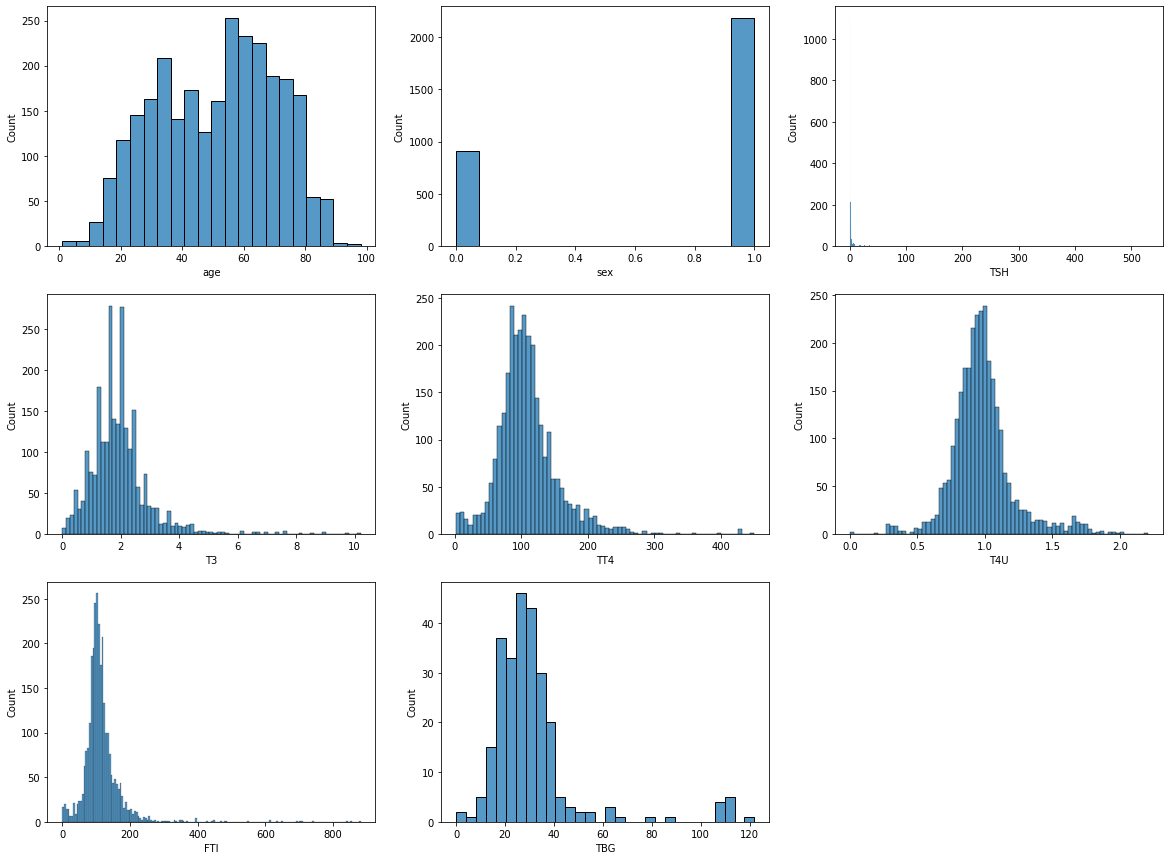

In [13]:
columns_dict = {'age':1, 'sex':2, 'TSH':3, 'T3':4, 'TT4':5, 'T4U':6, 'FTI':7, 'TBG':8}

# plot histograms for columns with missing data to visualize the patterns/trends in the data
plt.figure(figsize = (20,15))
for variable,i in columns_dict.items():
  
  plt.subplot(3,3,i)
  sns.histplot(rawfile[variable])

plt.show()

In [14]:
# handling missing data
rawfile['age'].fillna(rawfile['age'].mean(), inplace = True)
rawfile['TSH'].fillna(rawfile['TSH'].mean(), inplace = True)
rawfile['T3'].fillna(rawfile['T3'].median(), inplace = True)
rawfile['TT4'].fillna(rawfile['TT4'].median(), inplace = True)
rawfile['T4U'].fillna(rawfile['T4U'].mean(), inplace = True)
rawfile['FTI'].fillna(rawfile['FTI'].median(), inplace = True)
rawfile['TBG'].fillna(rawfile['TBG'].mean(), inplace = True)

In [15]:
# check the number of missing data remaining 
rawfile.isnull().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
TBG_measured                  0
TBG                           0
dtype: int64

>The 'sex' column is left with 73 null values. It is hard to determine the sex of a patient with the data in the other columns hence we cannot fill them with a mean or median. Hence, they will be dropped.

In [16]:
# drop the remaining null values and check the result
data = rawfile.dropna(axis=0)
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [17]:
# check the resulting shape of the data
data.shape

(3090, 26)

## Outliers

In [18]:
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

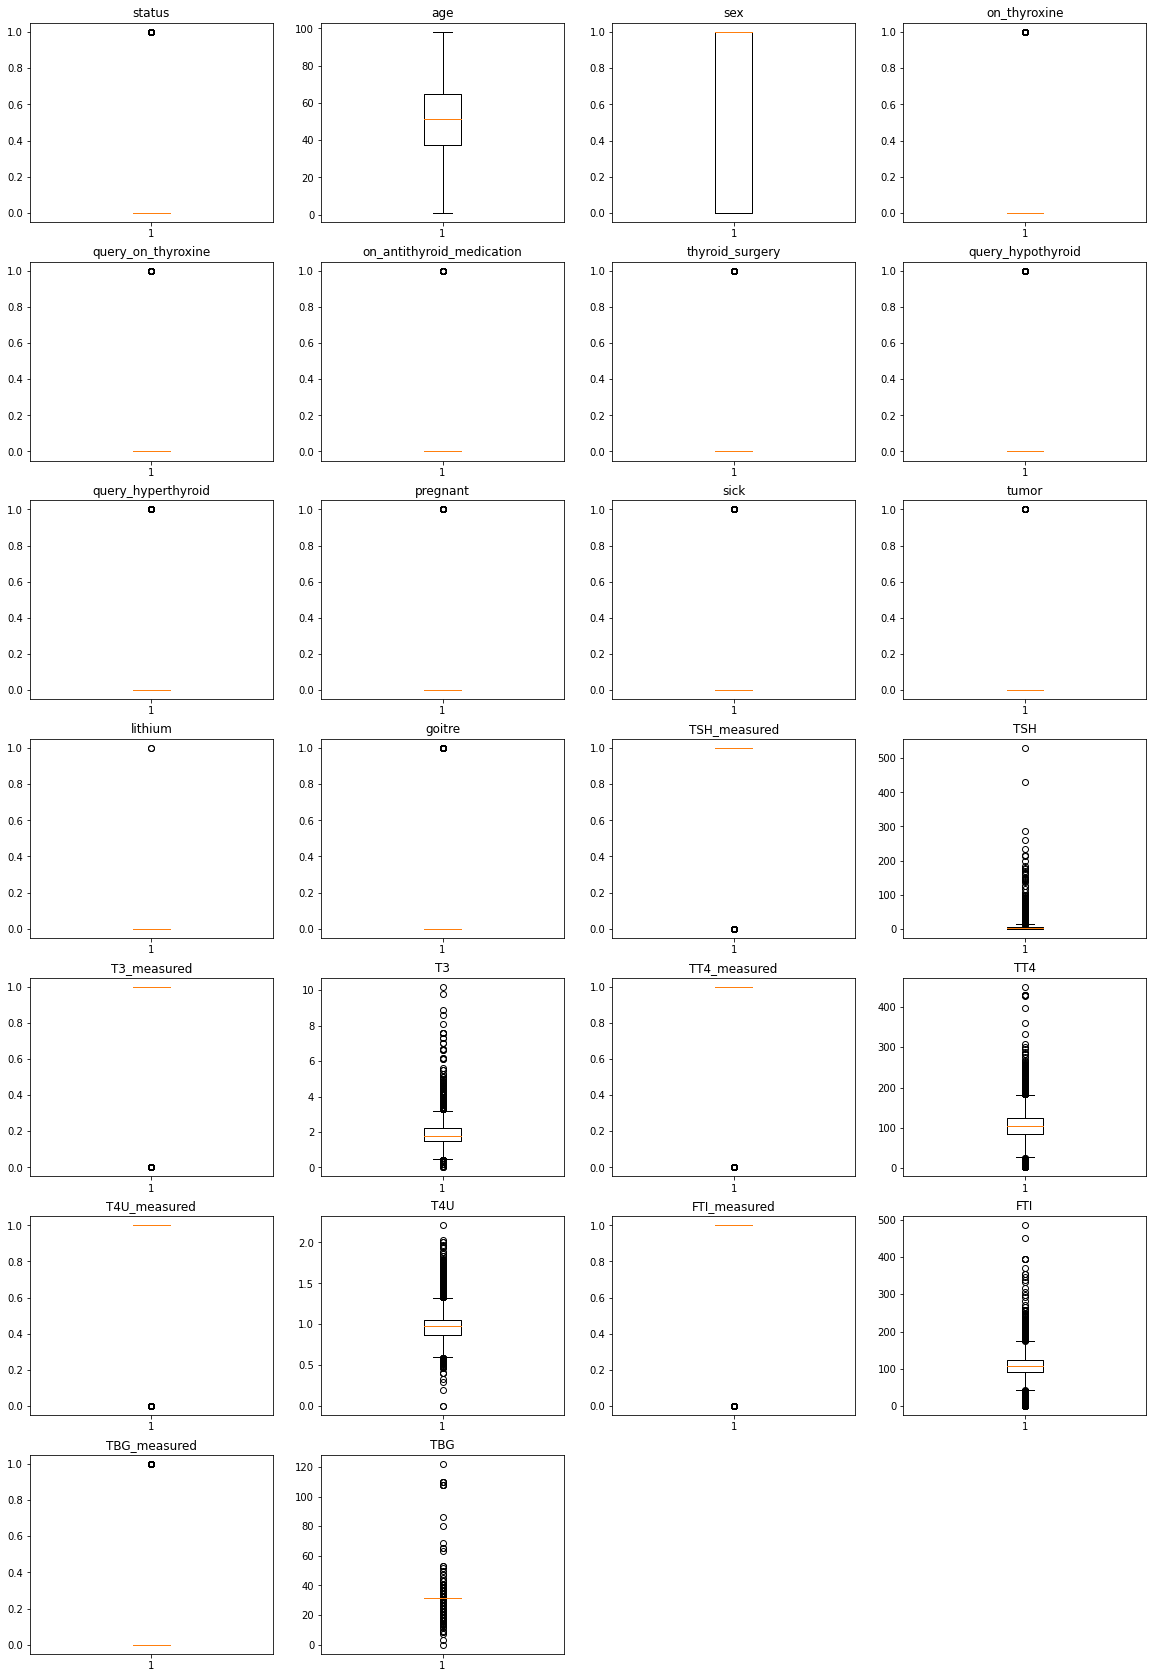

In [19]:
# Checking for Outliers
 
# save the column names onto a dictionary
columns_dict = {'status':1, 'age':2, 'sex':3, 'on_thyroxine':4, 'query_on_thyroxine':5, 'on_antithyroid_medication':6, 
                'thyroid_surgery':7, 'query_hypothyroid':8, 'query_hyperthyroid':9, 'pregnant':10, 'sick':11, 'tumor':12, 
                'lithium':13, 'goitre':14, 'TSH_measured':15, 'TSH':16, 'T3_measured':17, 'T3':18, 'TT4_measured':19,
                'TT4':20, 'T4U_measured':21, 'T4U':22, 'FTI_measured':23, 'FTI':24, 'TBG_measured':25, 'TBG':26}


plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(7,4,i)
  plt.boxplot(data[variable])
  plt.title(variable)

plt.show()

In [20]:
# # dealing with outliers

# print(f"Size of dataset with outliers: {data.shape}")
# # dealing with outliers
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# data_out = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# print("...................")

# print(f"Size of dataset after removal of outliers: {data_out.shape}")

>We will not remove outliers in this case because removing them especially on categorical data causes it to be reduced to just one category in the data

## Anomalies

In [21]:
# checking for anomalies
# calculate the interquartile range using pandas
Q1 = data['TSH'].quantile(0.25)
Q3 = data['TSH'].quantile(0.75)
IQR = Q3 - Q1

# calculate the interquartile range using numpy
iqr1 = np.quantile(data['TSH'], .25)
iqr3 = np.quantile(data['TSH'], .75)
IQR2 = iqr3 - iqr1

# compare the two values
print(IQR, IQR2)

5.923179962894247 5.923179962894247


# **Exploratory Data Analysis**

## Univariate Analysis

**Histogram plots for the data distribution**

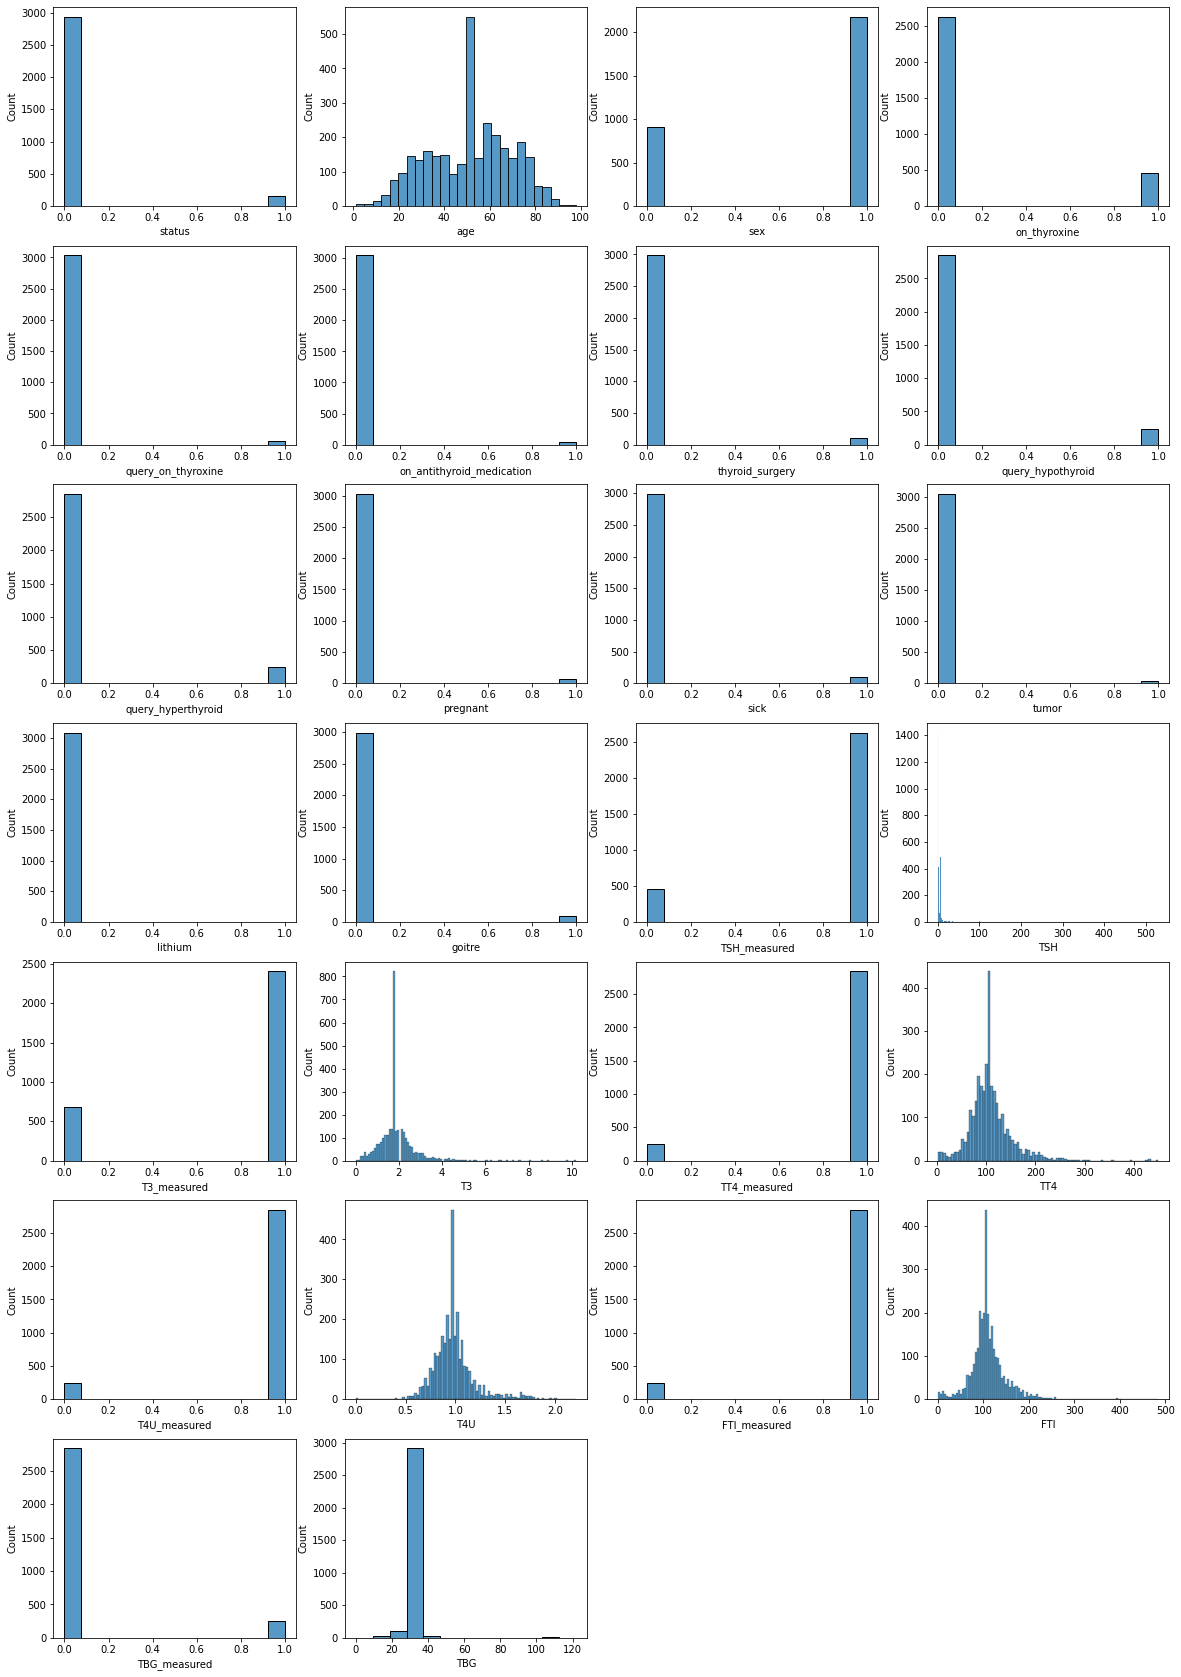

In [22]:
# plot histograms for all numeric columns
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  plt.subplot(7,4,i)
  sns.histplot(data[variable])

plt.show()

>Most of the data is categorical with values 1 and 0. The other columns with non-categorical data follows the shape of normal distribution.

**Measures of central tendency**

In [23]:
# compute the means of non-categorical data
data[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].mean()

# the mean age of patients in the data is 51 years

age     51.211697
TSH      5.936136
T3       1.902330
TT4    108.076990
T4U      0.984648
FTI    111.351748
dtype: float64

In [24]:
# compute the median points for each of the variables
data.median()

# for most categorical data, the median points are either 1 or 0 depending on the distribution of data in those columns

status                         0.000000
age                           51.154214
sex                            1.000000
on_thyroxine                   0.000000
query_on_thyroxine             0.000000
on_antithyroid_medication      0.000000
thyroid_surgery                0.000000
query_hypothyroid              0.000000
query_hyperthyroid             0.000000
pregnant                       0.000000
sick                           0.000000
tumor                          0.000000
lithium                        0.000000
goitre                         0.000000
TSH_measured                   1.000000
TSH                            1.000000
T3_measured                    1.000000
T3                             1.800000
TT4_measured                   1.000000
TT4                          104.000000
T4U_measured                   1.000000
T4U                            0.978199
FTI_measured                   1.000000
FTI                          107.000000
TBG_measured                   0.000000


In [25]:
# compute the mode for each variable 
data.mode()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,51.154214,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,1.8,1,104.0,1,0.978199,1,107.0,0,31.283077


**Measures of dispersion**

In [26]:
# # find the standard deviations, quantiles, min and max values

# summary statistics of the data
data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,0.048220,51.211697,0.706149,0.147573,0.017799,0.013592,0.033010,0.077670,0.077670,0.020065,0.031715,0.012945,0.000647,0.031715,0.852427,5.936136,0.778964,1.902330,0.921036,108.076990,0.921359,0.984648,0.921683,111.351748,0.082524,31.268325
std,0.214266,18.042689,0.455598,0.354733,0.132243,0.115809,0.178691,0.267695,0.267695,0.140244,0.175269,0.113056,0.025437,0.175269,0.354733,22.296031,0.415012,0.870453,0.269727,43.339302,0.269221,0.210214,0.268713,41.380925,0.275206,5.369111
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,37.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.500000,1.000000,85.000000,1.000000,0.870000,1.000000,92.000000,0.000000,31.283077
50%,0.000000,51.154214,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.800000,1.000000,104.000000,1.000000,0.978199,1.000000,107.000000,0.000000,31.283077
75%,0.000000,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.923180,1.000000,2.200000,1.000000,124.000000,1.000000,1.050000,1.000000,125.000000,0.000000,31.283077
max,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,485.000000,1.000000,122.000000


In [27]:
# compute the variance for each variable
var = data.var()
var1 = pd.DataFrame()
var1['variance'] = var
var1.sort_values(by='variance', ascending=False)
# columns with higher variances are the non-categorical columns while categorical columns have lower variances

,variance
TT4,1878.295116
FTI,1712.380983
TSH,497.112977
age,325.538619
TBG,28.827356
T3,0.757688
sex,0.207570
T3_measured,0.172235
TSH_measured,0.125836
on_thyroxine,0.125836


In [28]:
# compute the skewness for each variable
data.skew()

# status, age, sex, TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured are negatvely skewed while the rest of the data is positively skewed 

status                        4.219740
age                          -0.176452
sex                          -0.905545
on_thyroxine                  1.988284
query_on_thyroxine            7.297372
on_antithyroid_medication     8.405581
thyroid_surgery               5.230183
query_hypothyroid             3.157355
query_hyperthyroid            3.157355
pregnant                      6.848702
sick                          5.347067
tumor                         8.621791
lithium                      39.287390
goitre                        5.347067
TSH_measured                 -1.988284
TSH                          10.977944
T3_measured                  -1.345240
T3                            2.449539
TT4_measured                 -3.123963
TT4                           1.622282
T4U_measured                 -3.132240
T4U                           1.268086
FTI_measured                 -3.140564
FTI                           1.631111
TBG_measured                  3.035876
TBG                      

In [29]:
data.kurt()

status                         15.816441
age                            -0.666822
sex                            -1.180753
on_thyroxine                    1.954539
query_on_thyroxine             51.284829
on_antithyroid_medication      68.698261
thyroid_surgery                25.371230
query_hypothyroid               7.974049
query_hyperthyroid              7.974049
pregnant                       44.933802
sick                           26.608343
tumor                          72.382126
lithium                      1542.497409
goitre                         26.608343
TSH_measured                    1.954539
TSH                           176.594575
T3_measured                    -0.190453
T3                             14.105888
TT4_measured                    7.764168
TT4                             8.265150
T4U_measured                    7.815985
T4U                             4.127086
FTI_measured                    7.868234
FTI                             9.563312
TBG_measured    

## Bivariate Analysis

**Scatter plots**

>Because TSH levels is a common determiner of hypothyroidism, make a plot of both non-categorical and categorical data against TSH to look at the trends of the data

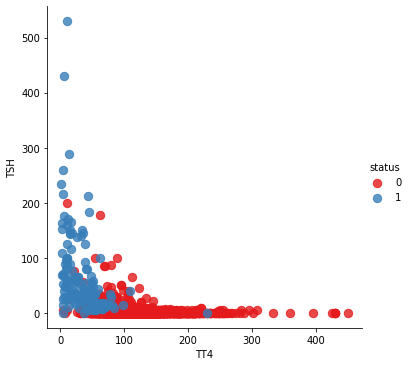

In [30]:
# Plotting some features
sns.lmplot('TT4','TSH', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})




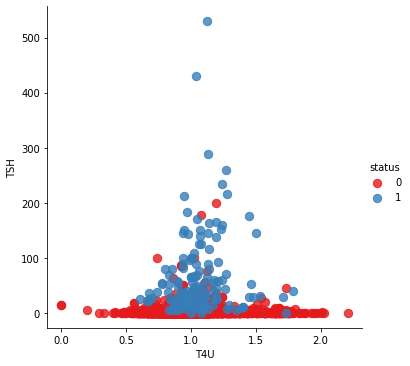

In [31]:
# Plotting some features
sns.lmplot('T4U','TSH', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

# patients with T4U levels ranging 0.6-1.7 are observed to habe hypothyroidism

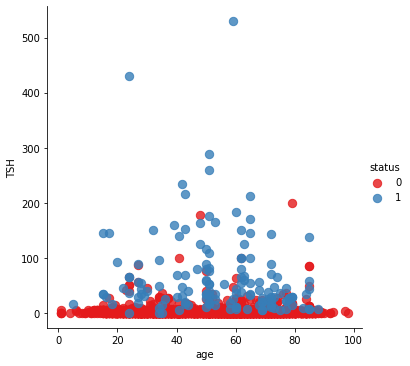

In [32]:
# data[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]

# Plotting some features
sns.lmplot('age','TSH', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})


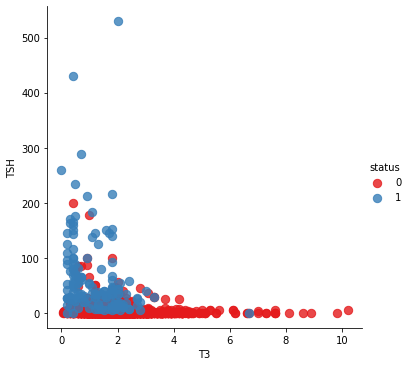

In [33]:
# Plotting some features
sns.lmplot('T3','TSH', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})


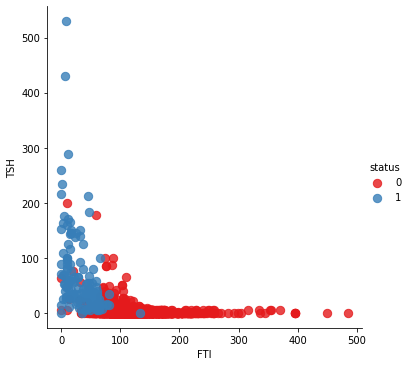

In [34]:
# Plotting some features
sns.lmplot('FTI','TSH', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})


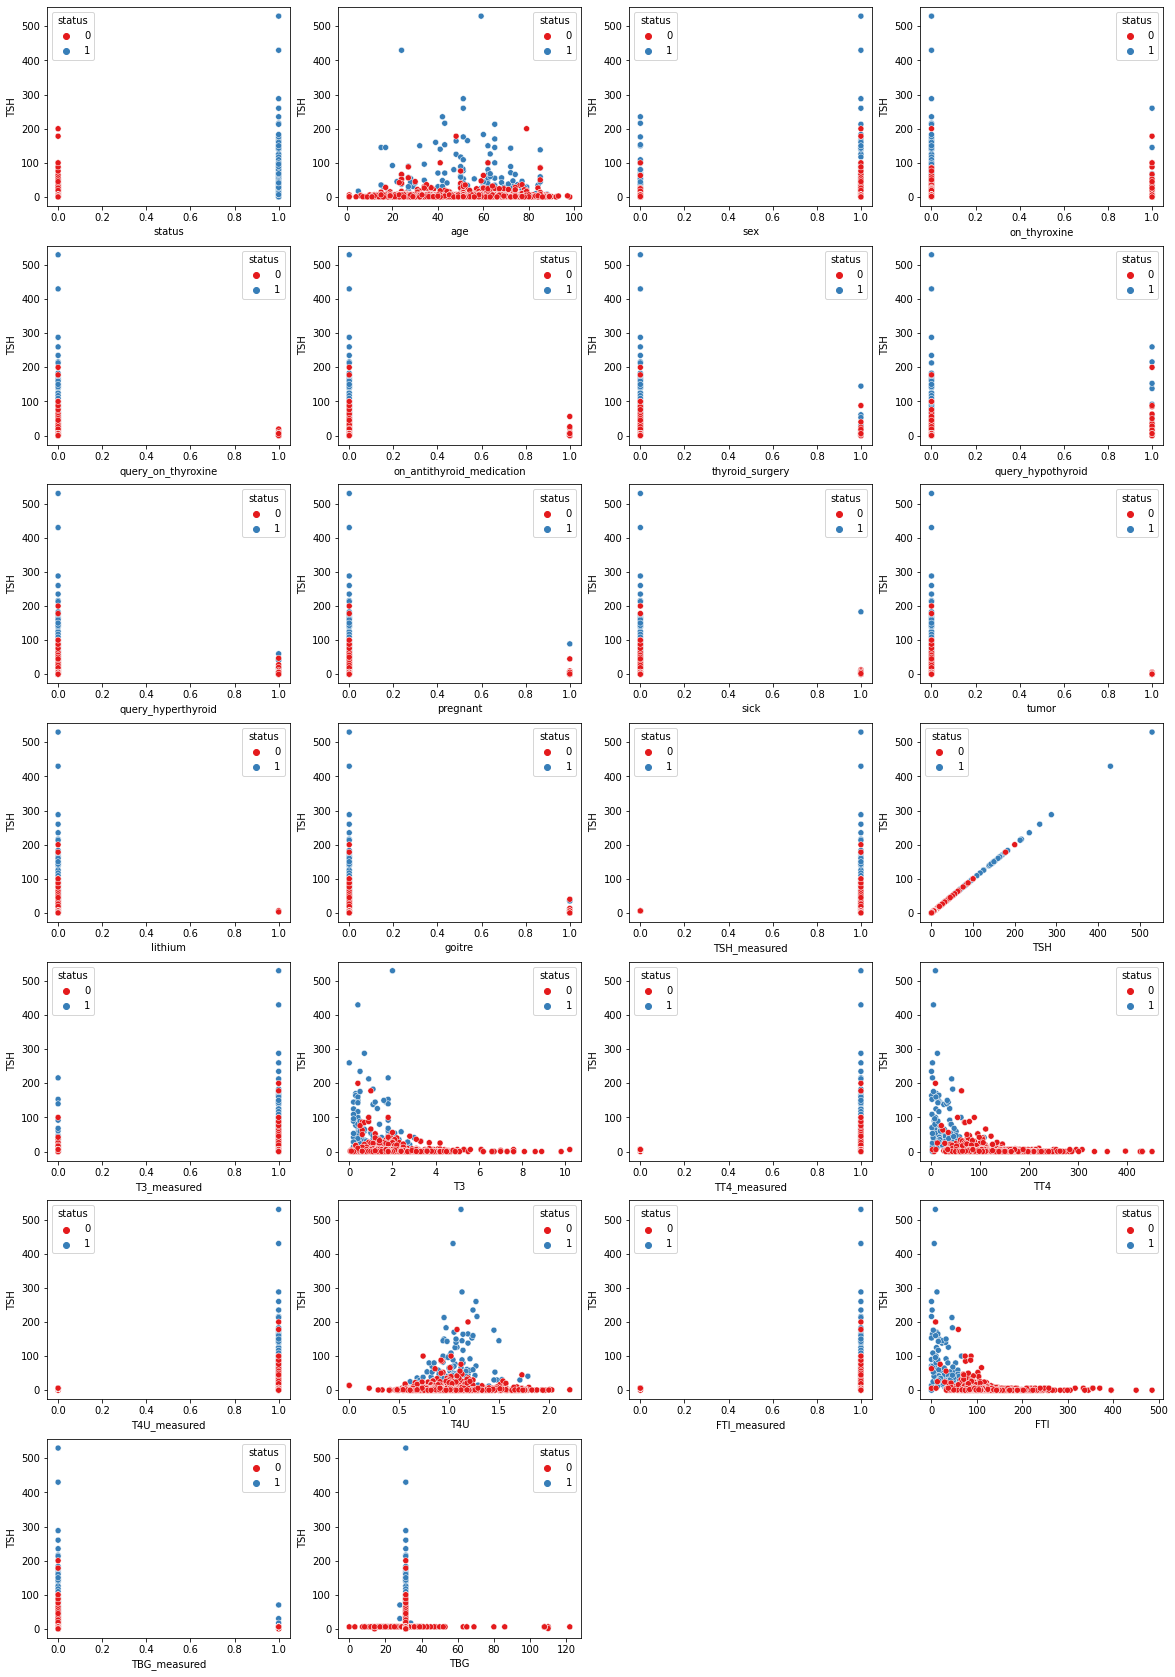

In [35]:
plt.figure(figsize=(20,30))
# for loop to make a scatterplot for each numerical column against TSH 
for variable,i in columns_dict.items():
  plt.subplot(7,4,i)
  x = data[variable]
  y = data['TSH']
  sns.scatterplot(data[variable], data['TSH'], hue=data['status'], palette='Set1')
  plt.xlabel(variable)
  plt.ylabel('TSH')

The red blue dots/scatters show that the patient tested positive for hypothyroidism while the red ones indicate negative results.
- patients diagnosed with hypothyroidism have high levels of TSH hormone
- patients who have lower levels of TT4 have hypothyroid regardless of their TSH-hormone levels
- the age of a patient does not clearly determine whether a patient has hypothyroidism or not-it is not an important feature during diagnosis
- lower amounts of T3 indicate hypothyroidism
- lower levels of FTI indicate presence of hypothyroidism
- patients that had/have goitre have high chances of being diagnosed with hypothyroidism
- patients who have not had thyroid surgery are more likely to be diagnosed with hypothyroidism
- patients with T4U levels ranging 0.6-1.7 are observed to habe hypothyroidism

**Correlation matrix**

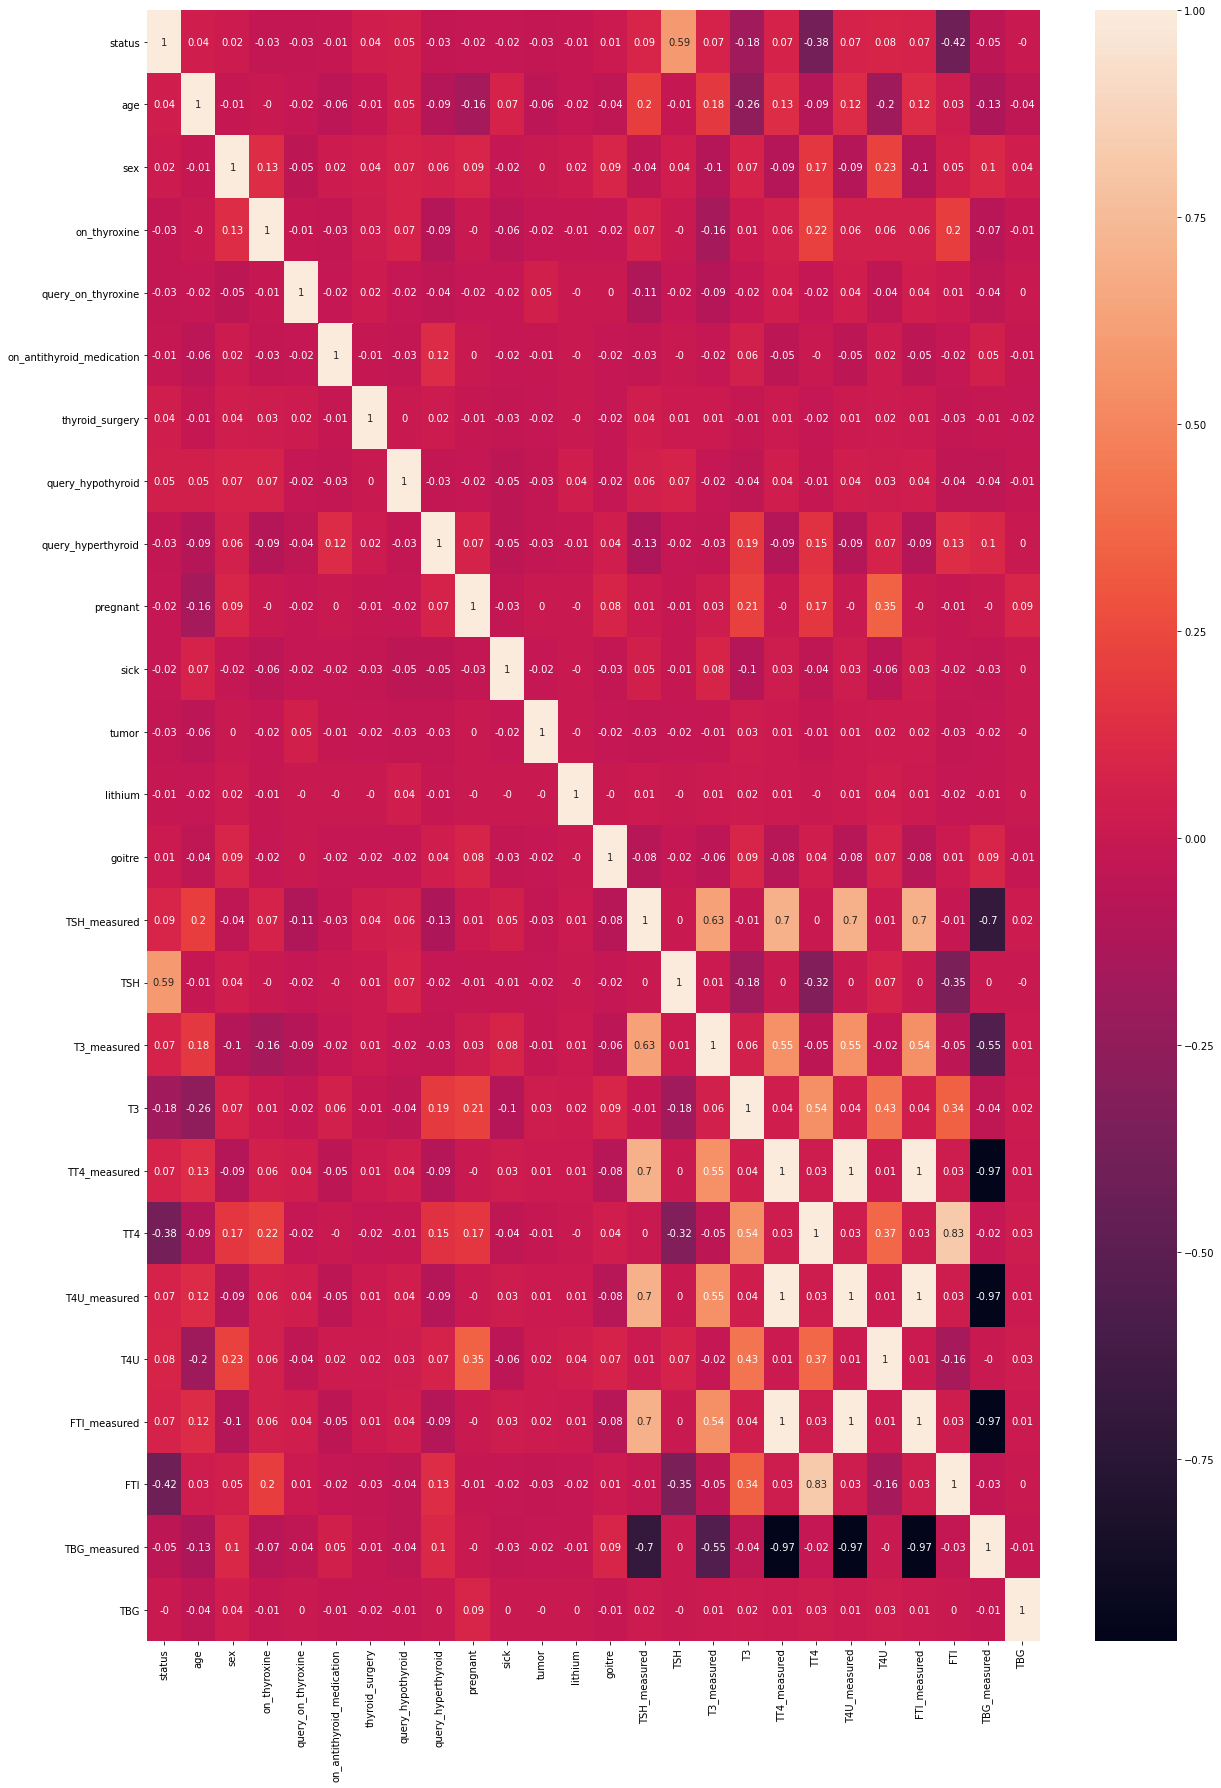

In [36]:
# plot a correlation matrix of the columns in the data
plt.figure(figsize=(20,30))
sns.heatmap(round(data.corr(),2), annot=True)

- As expected, there is a high correlation between status and TSH levels
- There also is a very high correlation between FTI and TT4 levels
- There is a slight correlation between T4U and whether a patient is pregnant or not
- There is a correlation between whether the following measurements were taken or not: TSH, T3, TT4, T4U, FTI and TBG.
- There also exists a correlation between T3 levels and TT4, T4U and FTI levels


## Multivariate Analysis

>Which factors contribute highly to a patients diagnosis of hypothyroidism? Factor analysis is most likely to give us these factors.

In [37]:
# remove the status column from the data
df = data.drop('status', 1)
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,72.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,31.283077
1,15.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,31.283077
2,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,31.283077
3,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,31.283077
4,77.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,31.283077


In [38]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
#The p value is 0 the observed matrix is not an identity matrix, hence we can continue to perform factor analysis on the data

(59757.17141394908, 0.0)

In [39]:
# Creating factor analysis object and perform factor analysis 
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(df,25, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev
# Here, we can see only for 8 eigenvalues(factors) are greater than one. 
# It means we need to choose only 8 factors (or unobserved variables).

,Original_Eigenvalues
0,4.986275
1,2.674034
2,1.691890
3,1.329565
4,1.191865
5,1.115553
6,1.025669
7,1.019369
8,0.997078
9,0.990761


In [40]:
fa = FactorAnalyzer()
fa.analyze(df, 8, rotation="varimax")
print(fa.loadings)

# We will note that Factor 5 and 8 do not have high factor loadings, so we can reduce them to only 6 factors

fa.analyze(df, 6, rotation="varimax")
fa.loadings
# Factor 1 has high factor loadings for TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured,TBG_measured
# Factor 2 has high factor loadings for TT4, FTI
# Factor 3 has high factor loadings for T3, T4U
# Factor 4 has high factor loadings for on_thyroxine
# Factor 5 has high factor loadings for T3_measured, which has already been recorded on the first factor, so we can exclude it
# Factor 6 has high factor loadings for query_hyperthyroid

                            Factor1   Factor2  ...   Factor7   Factor8
age                        0.113675 -0.023156  ...  0.476383 -0.194647
sex                       -0.095462  0.044948  ...  0.093999  0.213832
on_thyroxine               0.035556  0.157054  ... -0.095528 -0.017791
query_on_thyroxine         0.021511  0.005012  ... -0.038991 -0.033479
on_antithyroid_medication -0.035291 -0.013910  ... -0.073002 -0.027115
thyroid_surgery            0.011003 -0.032707  ... -0.028809 -0.038879
query_hypothyroid          0.033386 -0.059418  ...  0.050850 -0.026920
query_hyperthyroid        -0.060499  0.104209  ...  0.027952  0.108186
pregnant                   0.021352  0.049336  ... -0.101419  0.446292
sick                       0.030499 -0.014495  ...  0.142375  0.002684
tumor                      0.014044 -0.004186  ... -0.091723  0.003744
lithium                    0.007326 -0.012654  ... -0.016616 -0.011257
goitre                    -0.079557  0.021708  ...  0.002860  0.164225
TSH_me

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
age,0.128894,-0.018293,-0.288228,0.073761,0.280248,-0.144756
sex,-0.103868,0.041556,0.182785,0.323316,0.095270,0.042830
on_thyroxine,0.037015,0.171634,-0.005668,0.408925,-0.065639,-0.150253
query_on_thyroxine,0.023451,0.008814,-0.051744,-0.052272,-0.243148,-0.031537
on_antithyroid_medication,-0.034562,-0.014805,0.028558,-0.017980,0.006633,0.183584
thyroid_surgery,0.012695,-0.031961,0.003560,0.068479,0.022466,0.029018
query_hypothyroid,0.035436,-0.056773,-0.014166,0.209023,0.049615,-0.031920
query_hyperthyroid,-0.059801,0.103318,0.047858,0.021532,0.056458,0.646130
pregnant,-0.000763,0.033505,0.395850,0.009628,-0.012204,0.065682
sick,0.031458,-0.016953,-0.060373,-0.086675,0.089511,-0.081635


In [41]:
# Getting variance of each factors

fa.get_factor_variance()

# Noting total 41% cumulative Variance explained by the 6 factors.
# We conclude that the we have found 5 factors that contribute highly to diagnosis of a patient as having hypothyroidism


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,4.820595,2.110868,1.490946,0.599763,0.619571,0.612562
Proportion Var,0.192824,0.084435,0.059638,0.023991,0.024783,0.024502
Cumulative Var,0.192824,0.277259,0.336896,0.360887,0.385670,0.410172


We conclude that the we have found 5 factors that contribute highly during diagnosis of a patient as having hypothyroidism or not: 
- whether a patient has undergone the following tests and has had the TSH, T3, TT4,T4U, FTI and TBG levels measured
- TT4 and FTI levels
- T3 and T4U levels
- whether a patient is on thyroxine or not
- whether query_hyperthyroid is false or true


# **Modeling**

## Decision Trees

In [42]:
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

<font color='green'>Split the data into train and test sets

In [43]:
# selecting features and labels
y = data['status'].values  #labels

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
                 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 
                 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']

X = data[test_features].values #features

# scaling the features
X = StandardScaler().fit_transform(X)

# splitting data into train and test sets with 80% of the data in the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Random Forest Classification**

<font color='green'>Fitting the model

In [44]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Let's now build the model
forest = RandomForestClassifier(n_estimators = 300, max_depth=4, min_samples_split=2)
# training the model using the training data
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_rand = forest.predict(X_test)

# compare the actual data and predicted data on a dataframe
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rand})
# summary statistics of the comparison dataframe
comparison_frame.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.051780,0.043689
std,0.221762,0.204569
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


<font color='green'>Performance and evaluation

In [45]:
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rand))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rand))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rand)))

print("..................")

# assess the scores
print('R2_score:' ,r2_score(y_test, y_pred_rand))
print('Model score:', forest.score(X_test, y_test))

print("..................")

# Model Accuracy, how often is the classifier correct?
print('Random Forest accuracy:', accuracy_score(y_test,y_pred_rand))

# For further evaluation check the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rand)
confusion_matrix

Mean Absolute Error: 0.011326860841423949
Mean Squared Error: 0.011326860841423949
Root Mean Squared Error: 0.10642772590553623
..................
R2_score: 0.7693046075085324
Model score: 0.988673139158576
..................
Random Forest accuracy: 0.988673139158576


array([[585,   1],
       [  6,  26]])

>Random forest classifier model is quite accurate with a high accuracy score though with some little misclassification on the confusion matrix

<font color='green'>Visualization

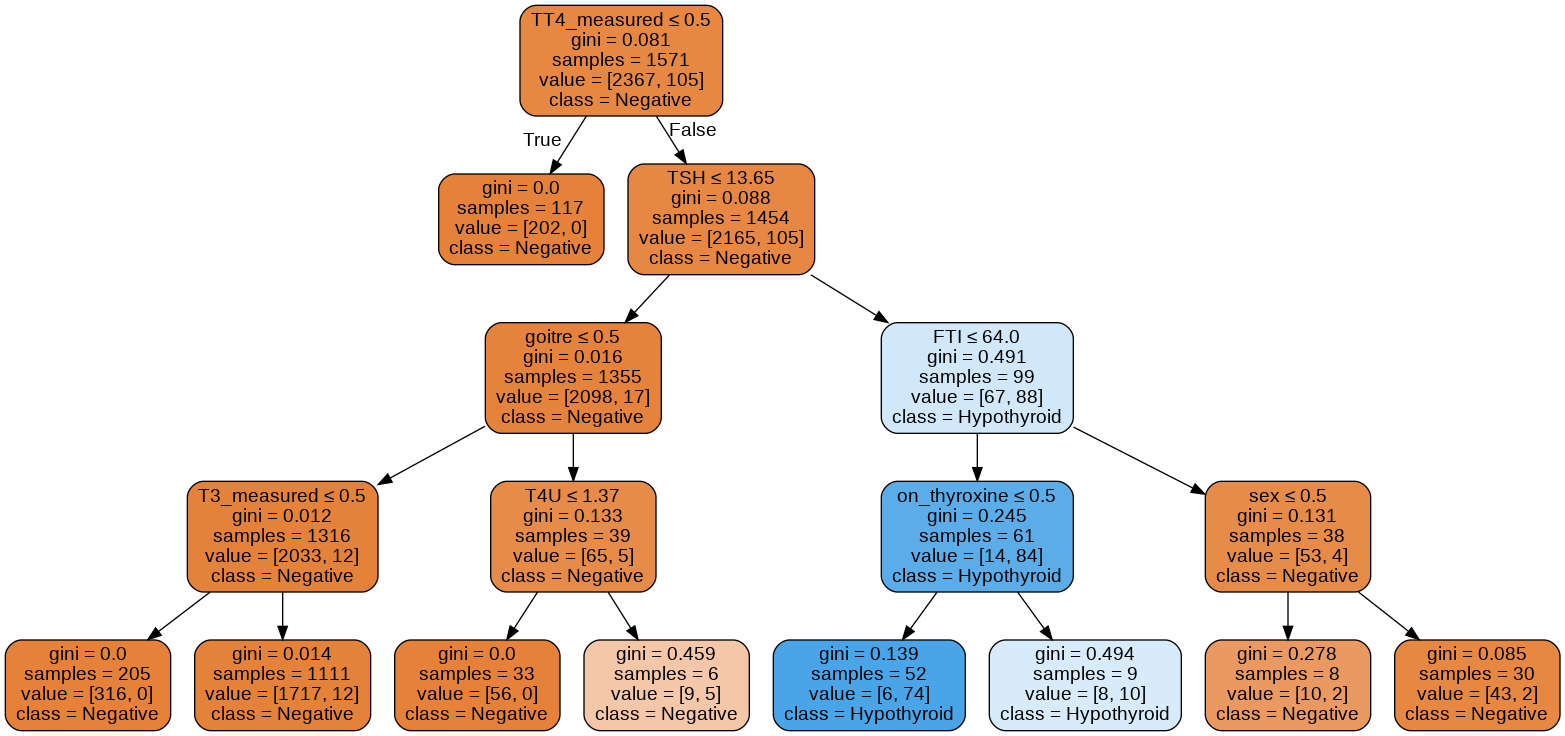

In [46]:
# importing graphing libraries
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features, class_names=['Negative', 'Hypothyroid'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('random_forest_hypothyroidism.png')
Image(graph.create_png())


**<font color='green'>Feature Importances**

In [47]:
# Get numerical feature importances
importances = list(forest.feature_importances_)

# connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

# sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: FTI                  Importance: 0.35
Variable: TT4                  Importance: 0.28
Variable: TSH                  Importance: 0.24
Variable: T3                   Importance: 0.06
Variable: T4U                  Importance: 0.02
Variable: age                  Importance: 0.01
Variable: TSH_measured         Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: TT4_measured         Importance: 0.0
V

>The most important features in the model are: FTI, TT4, TSH, T3 and T4U levels, Age, and whether or not a patient has had their TSH levels measured

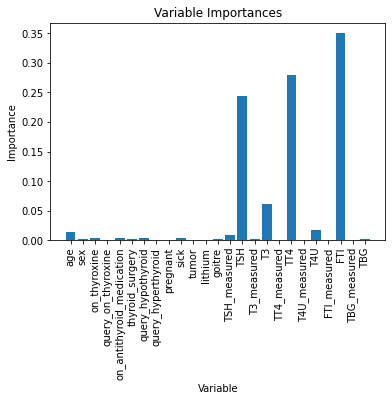

In [48]:
# feature importances can also be plotted

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


>From the graph, other features are also observed to have some weight, but these were initially rounded off to 0s. The most important features are observed to have high bars.

### **Gradient Boosting Classifier**

In [49]:
# importing library
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

# building the model
gbc = GradientBoostingClassifier(n_estimators = target_number_of_trees, learning_rate=0.1, max_depth=4, min_samples_split=2)
# training the model
gbc = gbc.fit (X_train, y_train)

# making predictions using the trained model
y_pred_gbc = gbc.predict(X_test)

# compare the actual data and predicted data on a dataframe
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gbc})
# summary statistics of the comparison dataframe
comparison_frame.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.051780,0.048544
std,0.221762,0.215086
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


>The mean and standard deviation of the predicted values are very close to the actual values compared to the previous Random Forest Classifier model.

<font color='green'>Performance and evaluation

In [50]:
# assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbc))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbc))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbc)))

print("..................")

# assess the scores
print('R2_score:' ,r2_score(y_test, y_pred_gbc))

print("..................")

# Model Accuracy, how often is the classifier correct?
print('Gradient Boost Classifier accuracy:', accuracy_score(y_test,y_pred_gbc))

'''
# For further evaluation also check the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_gbc)
confusion_matrix
'''

Mean Absolute Error: 0.006472491909385114
Mean Squared Error: 0.006472491909385114
Root Mean Squared Error: 0.08045179867091297
..................
R2_score: 0.8681740614334471
..................
Gradient Boost Classifier accuracy: 0.9935275080906149


'\n# For further evaluation also check the confusion matrix\nconfusion_matrix = confusion_matrix(y_test, y_pred_gbc)\nconfusion_matrix\n'

>The Mean squared error, r-squared score and model accuracy of the gradient boosting classifier improve by a great deal compared to the random forest classifier model

<font color='green'>Feature Importance

In [51]:
# Get numerical feature importances
importances = list(gbc.feature_importances_)

# connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

# sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: FTI                  Importance: 0.62
Variable: TSH                  Importance: 0.28
Variable: age                  Importance: 0.03
Variable: on_thyroxine         Importance: 0.01
Variable: on_antithyroid_medication Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: T3                   Importance: 0.01
Variable: TT4                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: TSH_measured         Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: TT4_measured         Importance: 0.0
Variable: T4U_measured         Importance: 0.0


>The most important features in the model are: FTI, TSH, Age,on thyroxine, on antithyroid medication, query hypothyroid, T3, TT4, T4U at 0.61, 0.28, 0.03 and the rest at 0.01 respectively. 
>These fields are somewhat different from the ones from the random forest classifer model. 

>Gradient boost classifier is better than the random forest model as more features have been added and given more importance. 

We can also plot the feature importances 

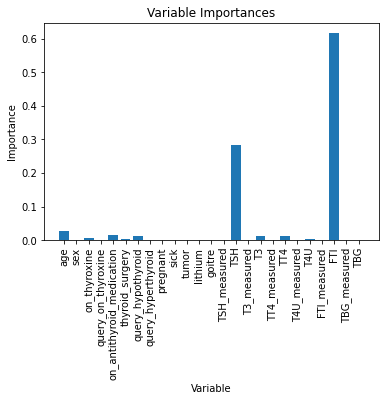

In [52]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# formatting and labelling the plot
plt.xticks(x_values, test_features, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


The most important features are the FTI and TSH levels followed by age. The other features do not carry much weight and are at 0.01 and 0.0 

### **Ada Boost Classifier**

In [53]:
# importing libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# building the model
ada_boost= AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=300, learning_rate=0.1)

# training the model
ada_boost = ada_boost.fit(X_train, y_train)

# making predictions
y_pred_ada = ada_boost.predict(X_test)

# making comparison of actual data and predicted values
comparison = pd.DataFrame({'Actual':y_test, 'Predicted_Ada':y_pred_ada})
comparison.describe()

,Actual,Predicted_Ada
count,618.000000,618.000000
mean,0.051780,0.043689
std,0.221762,0.204569
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


>The mean and standard deviation of the Ada Boost Classifier is slighlty lower than that of the Gradient Boost Classifier but higher than that of the Random Forest Classifier. 

This means that the Ada Boost Classifier performs better than the Random Forest model but poor compared to the Gradient Boost model.

We can look at the performance metrics to see this difference.

<font color='green'>Model Performance evaluation

In [54]:
# assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))

print("..................")

# assess the scores
print('R2_score:' ,r2_score(y_test, y_pred_ada))

print("..................")

# Model Accuracy, how often is the classifier correct?
print('Ada Boost Classifier accuracy:', accuracy_score(y_test,y_pred_ada))


Mean Absolute Error: 0.008090614886731391
Mean Squared Error: 0.008090614886731391
Root Mean Squared Error: 0.0899478453701443
..................
R2_score: 0.8352175767918089
..................
Ada Boost Classifier accuracy: 0.9919093851132686


>The Mean squared error, r-squared score and model accuracy of the gradient boosting classifier improve by a great deal compared to the random forest classifier model but are lower than that of the gradient boosting classifier

<font color='green'>Feature Importance

In [55]:
# Get numerical feature importances
importances = list(ada_boost.feature_importances_)

# connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

# sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: TT4                  Importance: 0.25
Variable: TSH                  Importance: 0.19
Variable: FTI                  Importance: 0.14
Variable: age                  Importance: 0.09
Variable: thyroid_surgery      Importance: 0.08
Variable: T4U                  Importance: 0.07
Variable: T3                   Importance: 0.06
Variable: on_antithyroid_medication Importance: 0.05
Variable: on_thyroxine         Importance: 0.03
Variable: query_hypothyroid    Importance: 0.02
Variable: sick                 Importance: 0.01
Variable: TSH_measured         Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: TT4_measured         Importance: 

>The ada boost classifier also adds more weight on some of the features such as whether a patient has had thyroid surgery or not, whether a patient is sick or not including the ones mentioned on the Gradient Boosting Classifier.

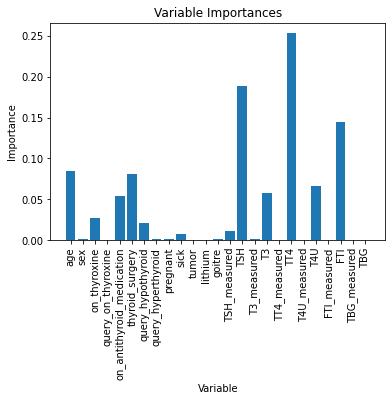

In [56]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# formatting and labelling the plot
plt.xticks(x_values, test_features, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


>From the graph, we can see that more features have been given more importance in the Ada Boost Classifier compared to the other two models.

>All decision tree models we have built exhibit overfitting, which is undesirable which will make our models to perform poorly on unseen data. These models need to be tuned in order to achieve just the right model with minimum overfitting or underfitting

## Support Vector Machine

### Modelling with two features

>From the above models using decision trees, it is clear that the two most important features are the TSH and FTI levels as they are given more importance in all the three models. Therefore, I will use these two features to classify using an SVM model. 

Keeping in mind that those features might not be suitable for SVM, It might be a good idea to graph them first.

It will also be much easier to plot on a 2d-graph using two features.

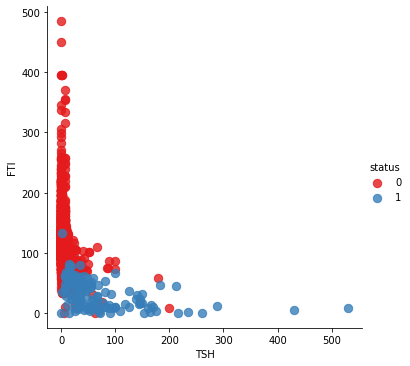

In [57]:
# Plotting our desired features
sns.lmplot('TSH','FTI', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})


>FTI is considered a more reliable indicator of thyroid status in the presence of abnormalities in plasma protein binding.
- It is elevated in hyperthyroidism and **depressed in hypothyroidism.**

>TSH rises whenever the thyroid gland fails to produce sufficient thyroid hormone. For the same reason, whenever there is too much thyroid hormone present in the serum, the brain responds by lowering the TSH.
- It is elevated in hyperthyroidism and **depressed in hypothyroidism.**

It is for these reasons that we see the trend the data plotted follows. Hypothyroidism is noted when the patient has low levels of both FTI and TSH hormones. 

In [288]:
# selecting the features and labels
X = data[['TSH', 'FTI']]
y = data['status']

# scaling the features
X = StandardScaler().fit_transform(X)

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Linear SVC**

In [289]:
# importing libraries
from sklearn.svm import SVC

# building the model
linear_SVC = SVC(kernel='linear')
# training the model
linear_SVC.fit(X_train, y_train)

# making predictions
y_pred_linSVC = linear_SVC.predict(X_test)

# making comparison of actual data and predicted values
comparison = pd.DataFrame({'Actual':y_test, 'Predicted_linSVC':y_pred_linSVC})
comparison.describe()

,Actual,Predicted_linSVC
count,618.000000,618.000000
mean,0.051780,0.035599
std,0.221762,0.185438
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


>The means and standard deviations of the linear SVC model are quite lower than those of the decision trees

<font color='green'>Model evaluation


In [290]:
# assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linSVC))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linSVC))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linSVC)))

print("..................")

# assess the scores
print('R2_score:' ,r2_score(y_test, y_pred_linSVC))

print("..................")

# Model Accuracy
print('Linear SVC accuracy:', accuracy_score(y_test,y_pred_linSVC))

# confusion matrix
# print(confusion_matrix(y_test, y_pred_linSVC))

Mean Absolute Error: 0.019417475728155338
Mean Squared Error: 0.019417475728155338
Root Mean Squared Error: 0.13934660285832354
..................
R2_score: 0.6045221843003412
..................
Linear SVC accuracy: 0.9805825242718447


>The model's accuracy is quite lower than that of the random forest model although it can still predict quite well as its accuracy is at 98% which is good, although it could be a clearly case of overfitting. 



<font color='green'>Visualization

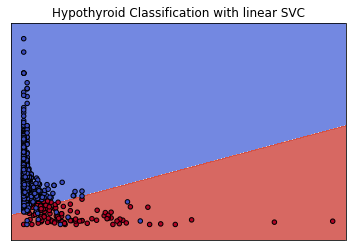

In [291]:

# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = linear_SVC.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, linear_SVC, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [292]:
# FUnction that predict whether a patient has hypothyroidism or not
def hypothyroidism(TSH, FTI):
    if(linear_SVC.predict([[TSH, FTI]]))==0:
        print('You do not have hypothyroidism!')
    elif(linear_SVC.predict([[TSH, FTI]]))==1:
        print('You have hypothyroidism!')

# Predict if a patient has TSH level at 30 and FTI at 0.0
hypothyroidism(30, 0)

You have hypothyroidism!


### **Polynomial SVC**

In [295]:
# Building the model 
polyclassifier = SVC(kernel='poly', degree=3)

# Training the model using the training set
polyclassifier.fit(X_train, y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<font color='green'>Visualization

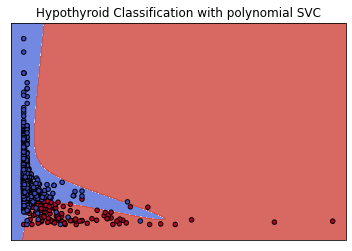

In [296]:

# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

>The classification on the plot looks much better than that of the linear kernel. 
Let us observe the performance of the model against the linear SVC. 

<font color='green'>Model Performance

In [297]:
# making prediction
y_pred_poly = polyclassifier.predict(X_test)

# assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

print("..................")

# assess the scores
print('R2_score:' ,r2_score(y_test, y_pred_poly))

print("..................")

# Model Accuracy
print('Polynomial SVC accuracy:', accuracy_score(y_test,y_pred_poly))

# confusion matrix
# print(confusion_matrix(y_test, y_pred_poly))


Mean Absolute Error: 0.016181229773462782
Mean Squared Error: 0.016181229773462782
Root Mean Squared Error: 0.12720546282869608
..................
R2_score: 0.6704351535836177
..................
Polynomial SVC accuracy: 0.9838187702265372


>The model accuracy has improved. The MSE and r-squared also improve from the linear SVC model.

### **Radial Basis Function**

In [299]:
# Building the model 
rbf = SVC(kernel='rbf')
# Training the model using the training set
rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<font color='green'>Visualization

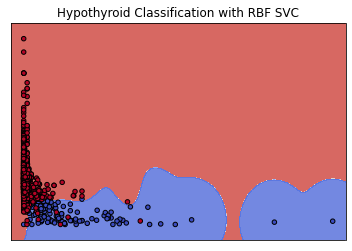

In [300]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with RBF SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbf, xx, yy, cmap=plt.cm.coolwarm_r, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm_r, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

>The classifications on the plot look even more defined with the rbf kernet compared to the linear and polynomial kernels

<font color='green'>Model performance and evaluation

In [301]:
# making prediction
y_pred_rbf = rbf.predict(X_test)

# assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rbf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf)))

print("..................")

# assess the scores
print('R2_score:' ,r2_score(y_test, y_pred_rbf))

print("..................")

# Model Accuracy
print('RBF SVC accuracy:', accuracy_score(y_test,y_pred_rbf))

# confusion matrix
# print(confusion_matrix(y_test, y_pred_rbf))

Mean Absolute Error: 0.011326860841423949
Mean Squared Error: 0.011326860841423949
Root Mean Squared Error: 0.10642772590553623
..................
R2_score: 0.7693046075085324
..................
RBF SVC accuracy: 0.988673139158576


>The model accuracy of the RBF kernel improves from that of the polynomial kernel, and so does the MSE and r-squared

So far this is the best performing kernel

## **Hyperparameter Tuning**

**Optimization: Parameter tuning**

All these models are a clear forms of overfitting. I used the default parameter values during my modelling. Therefore, I will try and tune these parameters to see how the RBF model performs and then pick the best parameters that I will use in my final modeling process. 

In [302]:
# importing libraries
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

# select the range for the C and gamma parameters
C_range = [0.001, 0.01, 0.1, 1, 10, 100]
gamma_range = [0.001, 0.01, 0.1, 1, 10, 100]

# fit the ranges on parameter grid
param_grid = dict(gamma=gamma_range, C=C_range)
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# use grid search together with the set parameters to find the best parameters and best model score
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# fit our data onto the grid model
grid.fit(X, y)

# find the models best parameters
best_parameters = grid.best_params_
print(best_parameters)

# find the models best score
best_result = grid.best_score_
print(best_result)


# print("The best parameters are %s with a score of %0.2f"
      # % (grid.best_params_, grid.best_score_))

{'C': 1, 'gamma': 10}
0.9851132686084142


*Fitting the model with these parameters*

In [273]:
# fit the model with these parameters
rbf = SVC(kernel='rbf', gamma=10, C=1)
# Training the model using the training set
rbf.fit(X_train, y_train)

# making prediction
y_pred_rbf = rbf.predict(X_test)

# Model Accuracy
print('RBF SVC accuracy:', accuracy_score(y_test,y_pred_rbf))


RBF SVC accuracy: 0.9870550161812298


>the accuracy level is just slightly lower than that of RBF without hyperparameter tuning. 



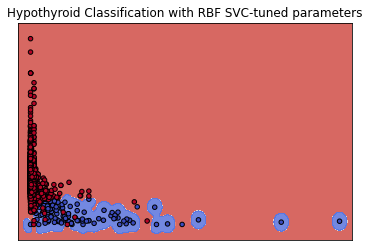

In [274]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with RBF SVC-tuned parameters')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbf, xx, yy, cmap=plt.cm.coolwarm_r, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm_r, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

There is more curvature compared to the previous plots and less errors with tuned parameters

In [281]:
# fit the model with these parameters
rbf = SVC(kernel='rbf', gamma=9, C=0.93)
# Training the model using the training set
rbf.fit(X_train, y_train)

# making prediction
y_pred_rbf = rbf.predict(X_test)

# Model Accuracy
print('RBF SVC accuracy:', accuracy_score(y_test,y_pred_rbf))


RBF SVC accuracy: 0.988673139158576


>Lowering the parameter values further than gamma=9 and C=0.93 causes the accuracy level of the model go to 99% which is even worse than our first model. 

>Therefore, the parameters we will use as we continue will be C=0.94, and gamma=9

### **Remodeling using RBF kernel and tuned parameters on all features**

<font color='green'>Modeling

In [285]:
# selecting features and labels
X = data.drop('status', 1)
y = data['status']

# scaling the features
X = StandardScaler().fit_transform(X)

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

# Building the model using the tuned hyperparameters
rbf = SVC(kernel='rbf', gamma=9, C=0.94)

# Training the model using the training set
rbf.fit(X_train, y_train)


SVC(C=0.94, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=9, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

<font color='green'>Model Performance

In [287]:
# making prediction
y_pred_tuned_rbf = rbf.predict(X_test)

# assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_tuned_rbf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_tuned_rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tuned_rbf)))

print("..................")

# assess the scores
print('R2_score:' ,r2_score(y_test, y_pred_tuned_rbf))

print("..................")

# Model Accuracy
print('Tuned RBF SVC accuracy:', accuracy_score(y_test,y_pred_tuned_rbf))

Mean Absolute Error: 0.045307443365695796
Mean Squared Error: 0.045307443365695796
Root Mean Squared Error: 0.21285545181107246
..................
R2_score: 0.07721843003412954
..................
Tuned RBF SVC accuracy: 0.9546925566343042


>This is the best accuracy score achived so far, even comparing it with the decision trees' models.

>**This model minimizes greatly on the overfitting** aspect that was clearly visible from our initial models and is therefore the best model to use for classifying a patient's status as either having hypothyroidism or not. 

# Challenging the solution

Our best model is the RBF support vector machine model. However, this should not be the end of it all. Other models such as the KNN can be built to try and see which model is the best. 

Also a test can be made on the model with unseen data and its performance evaluated and the model be tuned once more if it does not perform quite well. 

Generally, this will be an iterative process that will be done until the best model is achieved.

# Follow up questions

## a). Did we have the right data?

>Yes, the data available was appropriate for the research question that was stated. 

## b). Do we need other data to answer our question?

>It would be desirable if more variables were added. This would improve the predictive power of our model especially if some factors such as a patient's progress after medication, family history/has a family member ever been diagnosed with the same condition etc. is included.

## c). Did we have the right question?

>The research question was specific and appropriate and in line with our needs and the data available